In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'mlxtend'

In [2]:
df = pd.read_csv("oneyear.csv")


In [3]:
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-02-10T05:12:35.460Z,5.1033,125.3179,44.32,4.3,mb,NaN,131,1.970,0.70,...,2018-02-10T09:03:34.040Z,"36km SSW of Sarangani, Philippines",earthquake,5.0,9.3,0.126,18.0,reviewed,us,us
1,2018-02-10T00:31:19.880Z,-8.8535,117.1527,116.88,4.9,mb,NaN,59,2.991,1.06,...,2018-02-10T03:42:15.567Z,"32km SSW of Batudulang, Indonesia",earthquake,6.5,7.3,0.091,38.0,reviewed,us,us
2,2018-02-08T09:52:47.330Z,4.7512,96.2239,10.00,5.3,mww,NaN,148,0.862,1.29,...,2018-02-09T02:47:40.084Z,"51km S of Reuleuet, Indonesia",earthquake,6.6,1.8,0.073,18.0,reviewed,us,us
3,2018-02-07T22:28:37.900Z,-10.1202,118.7274,10.00,4.5,mb,NaN,86,3.764,0.95,...,2018-02-07T22:54:23.040Z,"61km SW of Panenggoede, Indonesia",earthquake,7.6,1.9,0.084,42.0,reviewed,us,us
4,2018-02-07T20:22:57.530Z,1.4361,127.0142,120.78,4.5,mb,NaN,105,0.748,0.76,...,2018-02-07T21:26:37.040Z,"82km NNW of Kota Ternate, Indonesia",earthquake,8.0,6.6,0.089,37.0,reviewed,us,us
5,2018-02-06T07:16:48.280Z,0.6058,126.2786,40.52,4.4,mb,NaN,113,1.100,0.37,...,2018-02-06T07:30:36.040Z,"122km W of Kota Ternate, Indonesia",earthquake,8.4,7.2,0.149,13.0,reviewed,us,us
6,2018-02-04T19:55:05.120Z,-9.1216,122.4742,142.29,5.2,mww,NaN,54,0.536,0.95,...,2018-02-04T20:08:05.040Z,"42km SSE of Habibola, Indonesia",earthquake,3.5,6.2,0.071,19.0,reviewed,us,us
7,2018-02-03T23:23:52.510Z,-1.3392,99.6884,45.74,4.7,mb,NaN,186,2.135,0.59,...,2018-02-03T23:56:56.472Z,"60km ENE of Muara Siberut, Indonesia",earthquake,9.0,8.1,0.088,39.0,reviewed,us,us
8,2018-02-03T22:50:44.200Z,1.0990,98.9888,106.01,4.2,mb,NaN,155,1.427,0.47,...,2018-02-04T06:53:43.402Z,"42km SW of Padangsidempuan, Indonesia",earthquake,7.3,4.8,0.122,19.0,reviewed,us,us
9,2018-02-03T18:28:58.520Z,7.1680,126.6065,76.31,4.7,mb,NaN,81,6.398,0.89,...,2018-02-06T15:58:28.040Z,"9km SE of Manay, Philippines",earthquake,9.1,1.9,0.049,126.0,reviewed,us,us


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 22 columns):
time               1369 non-null object
latitude           1369 non-null float64
longitude          1369 non-null float64
depth              1369 non-null float64
mag                1369 non-null float64
magType            1369 non-null object
nst                0 non-null float64
gap                1369 non-null int64
dmin               1369 non-null float64
rms                1369 non-null float64
net                1369 non-null object
id                 1369 non-null object
updated            1369 non-null object
place              1369 non-null object
type               1369 non-null object
horizontalError    1369 non-null float64
depthError         1369 non-null float64
magError           1368 non-null float64
magNst             1368 non-null float64
status             1369 non-null object
locationSource     1369 non-null object
magSource          1369 non-null object
dtypes

In [6]:
df.drop('nst',axis = 1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 21 columns):
time               1369 non-null object
latitude           1369 non-null float64
longitude          1369 non-null float64
depth              1369 non-null float64
mag                1369 non-null float64
magType            1369 non-null object
gap                1369 non-null int64
dmin               1369 non-null float64
rms                1369 non-null float64
net                1369 non-null object
id                 1369 non-null object
updated            1369 non-null object
place              1369 non-null object
type               1369 non-null object
horizontalError    1369 non-null float64
depthError         1369 non-null float64
magError           1368 non-null float64
magNst             1368 non-null float64
status             1369 non-null object
locationSource     1369 non-null object
magSource          1369 non-null object
dtypes: float64(10), int64(1), object(10)
me

In [9]:
X = df[['latitude','longitude']]
Y = [0 if mag<4.5 else 1 for mag in df.mag]


In [10]:
Y

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,


In [11]:
X.shape

(1369, 2)

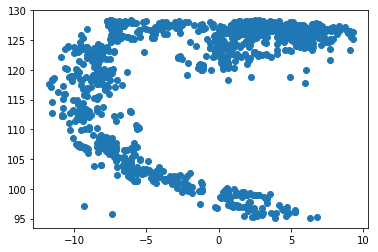

In [12]:
plt.scatter(X['latitude'],X['longitude'])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .25, random_state = 24)

In [14]:
svm_clf = svm.SVC()

In [15]:
svm_clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
svm_clf.predict(x_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [17]:
svm_clf.score(x_test,y_test)

0.5481049562682215

In [18]:
svm_clf.predict([[69,70]])

array([0])

In [ ]:
svm_linear = svm.LinearSVC()


In [ ]:
svm_linear = svm_linear.fit(x_train,y_train)

In [ ]:
svm_linear.score(x_test,y_test)

In [ ]:
intercept  = svm_linear.intercept_
intercept.shape

In [ ]:
coff = svm_linear.coef_
coff = coff[0]
coff

In [ ]:
svm_linear.decision_function

In [ ]:
x = np.linspace(-15,15,100) 

In [ ]:
x1 = X['latitude'].apply(lambda x: x*coff[0]+intercept)

In [ ]:
x2 = X['longitude'].apply(lambda x: x*coff[1])

In [ ]:
plt.scatter(x1,x2,color='red')



In [ ]:

plt.scatter(X['latitude'],X['longitude'])